In [525]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
#warnings.filterwarnings("ignore")

In [526]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [527]:
df.drop('CustomerID',axis=1,inplace=True)
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [528]:
columns = df.columns
columns = columns.tolist()
columns

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<Figure size 432x288 with 0 Axes>

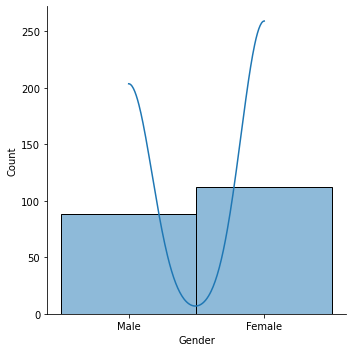

<Figure size 432x288 with 0 Axes>

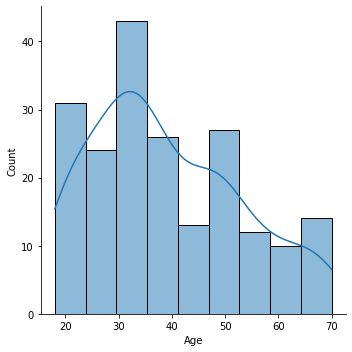

<Figure size 432x288 with 0 Axes>

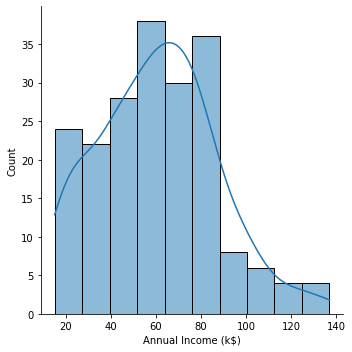

<Figure size 432x288 with 0 Axes>

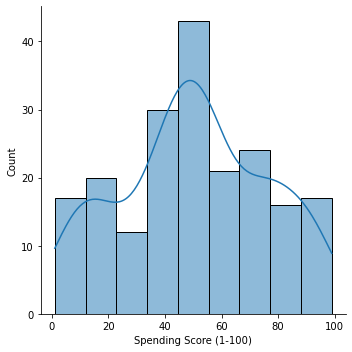

In [529]:
for col in columns:
    plt.figure()
    sns.displot(df[col],kde=True)

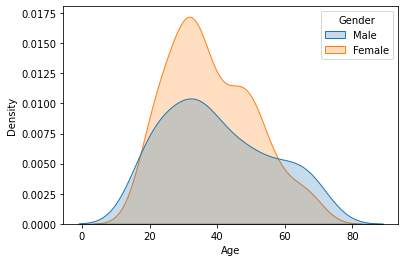

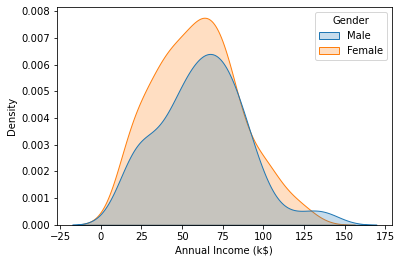

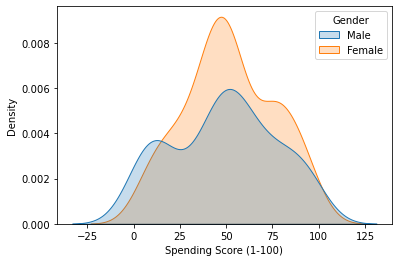

In [530]:
columns.pop(0)
for col in columns:
    plt.figure()
    sns.kdeplot(df[col], shade=True, hue=df['Gender'])

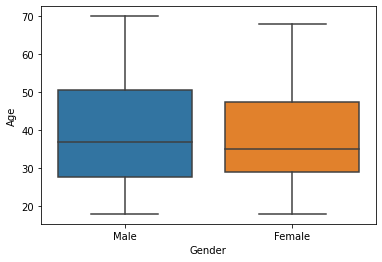

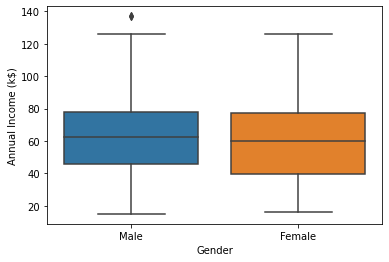

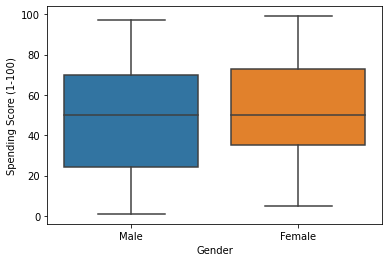

In [531]:
for col in columns:
    plt.figure()
    sns.boxplot(data=df,x = 'Gender', y=df[col])

# Bivariate Analysis

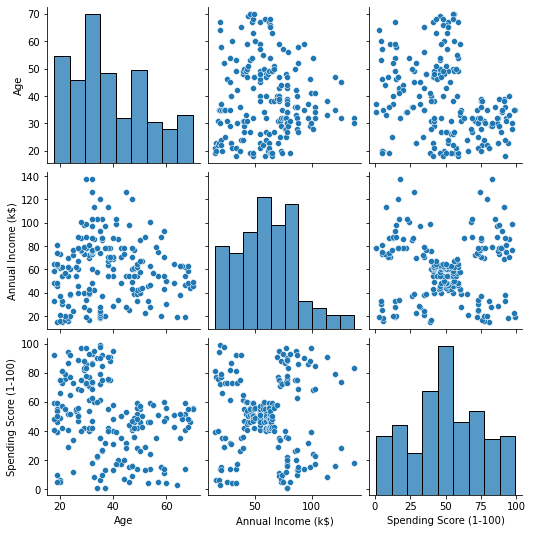

In [532]:
sns.pairplot(data=df)


In [533]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<AxesSubplot:>

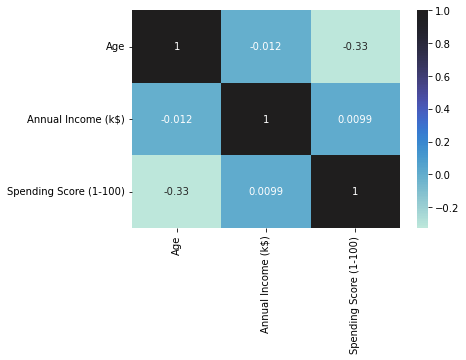

In [534]:
corrmatx = df.corr()
sns.heatmap(corrmatx, annot=True,center=True)

# Clustering - Univariate, Bivariate, Multivariate 

# Univariate

In [536]:
df_copy = df.copy()

cluster1 = KMeans(random_state=42)
for col in columns:
    cl = cluster1.fit(df_copy[[col]])
    df_copy['{}_cluster'.format(col)] = cl.labels_
    print(df_copy['{}_cluster'.format(col)].value_counts())
    
df_copy.head()

0    40
4    38
1    27
2    25
7    21
6    19
3    17
5    13
Name: Age_cluster, dtype: int64
7    40
0    36
1    30
6    30
3    26
4    16
2    14
5     8
Name: Annual Income (k$)_cluster, dtype: int64
4    33
0    31
3    30
5    30
2    27
1    22
7    14
6    13
Name: Spending Score (1-100)_cluster, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_cluster,Annual Income (k$)_cluster,Spending Score (1-100)_cluster
0,Male,19,15,39,2,1,3
1,Male,21,15,81,2,1,5
2,Female,20,16,6,2,1,7
3,Female,23,16,77,7,1,5
4,Female,31,17,40,4,1,3


# Elbow Method for Selecting Best No. of Clusters

In [537]:
inertias = {}
inertia = []
for col in columns: 
    inertia.clear()
    #one to ten clusters...ten inertias
    for i in range(1,11):
        km = KMeans(n_clusters=i)
        km.fit(df_copy[[col]])
        inertia.append(km.inertia_)
           
    inertias[col] = inertia[:10]
     
        

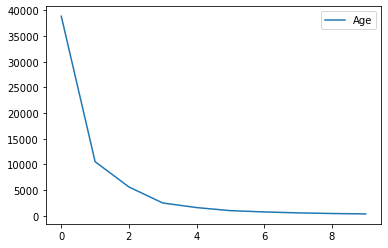

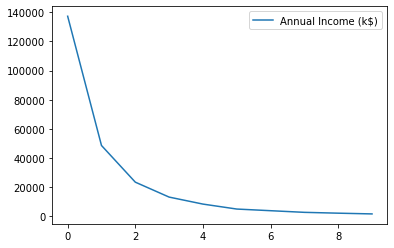

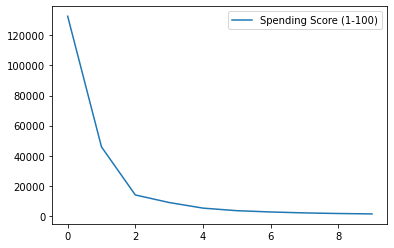

In [538]:
for key, values in inertias.items():
    x = np.arange(0,10,step = 1)
    plt.subplots()
    sns.lineplot(x=x,y=values,label=key)
     


# Reclustering with ideal number of clusters

In [539]:
n_clusters = {'Age':3,
              'Annual Income (k$)': 3,
             'Spending Score (1-100)': 2}
for key, value in n_clusters.items():
    km = KMeans(n_clusters = value,random_state=42)
    km.fit(df[[key]])
    df_copy['{}_cluster'.format(key)] = km.labels_
    print(df_copy['{}_cluster'.format(key)].value_counts())

df_copy.head()

0    98
1    66
2    36
Name: Age_cluster, dtype: int64
2    90
1    74
0    36
Name: Annual Income (k$)_cluster, dtype: int64
1    106
0     94
Name: Spending Score (1-100)_cluster, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_cluster,Annual Income (k$)_cluster,Spending Score (1-100)_cluster
0,Male,19,15,39,0,1,1
1,Male,21,15,81,0,1,0
2,Female,20,16,6,0,1,1
3,Female,23,16,77,0,1,0
4,Female,31,17,40,0,1,1


# Averages by Income, Spending, & Age Cluster

In [540]:
df_copy.groupby(['Annual Income (k$)_cluster','Gender'])['Annual Income (k$)','Spending Score (1-100)'].mean()

Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)_cluster Gender                                            
0                          Female          100.944444               54.055556
                           Male             98.833333               47.222222
1                          Female           33.800000               50.066667
                           Male             33.000000               50.482759
2                          Female           67.306122               51.938776
                           Male             66.829268               47.682927

In [541]:
df_copy.groupby(['Spending Score (1-100)_cluster','Gender'])['Spending Score (1-100)','Age'].mean()

Spending Score (1-100)        Age
Spending Score (1-100)_cluster Gender                                   
0                              Female               72.480769  34.134615
                               Male                 72.142857  34.142857
1                              Female               33.366667  41.533333
                               Male                 26.934783  44.978261

 # Bivariate

In [542]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [566]:
inertias = {}
inertia = []

df_3 = df.copy()
for col in columns: 
    #inertia.clear()
    #one to ten clusters...ten inertias
    for col2 in columns:
        inertia.clear()
        if col != col2:
            for i in range(1,11):
                km = KMeans(n_clusters=i)
                km.fit(df_3[[col,col2]])
                inertia.append(km.inertia_)

            inertias[col+'_'+col2] = inertia[:10]

final_inertias = {k: inertias[k] for k in ('Age_Spending Score (1-100)', 'Spending Score (1-100)_Annual Income (k$)')}       

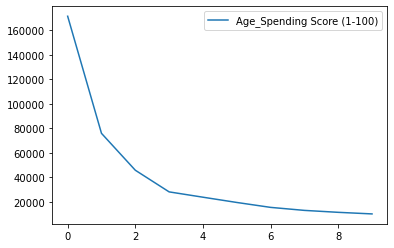

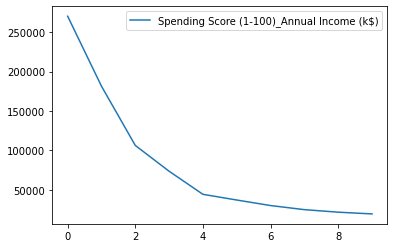

In [567]:
for key, values in final_inertias.items():
    x = np.arange(0,10,step = 1)
    plt.subplots()
    sns.lineplot(x=x,y=values,label=key)
     


In [568]:
n_clusters = {'Age_Spending Score (1-100)': 3,
             'Spending Score (1-100)_Annual Income (k$)': 5}
centers = {}

def bivariate_clustering ():

    for key, value in n_clusters.items():
        km = KMeans(n_clusters = value,random_state=42)

        col, col2 = key.split('_')
        km.fit(df_3[[col,col2]])
        df_3['{}_cluster'.format(key)] = km.labels_
        
        center = pd.DataFrame(km.cluster_centers_)
        center.columns = ['x','y']
        centers[key] = (center.x,center.y)
        
        print(df_3['{}_cluster'.format(key)].value_counts())
    
     

bivariate_clustering()
df_3.head()

0    91
2    62
1    47
Name: Age_Spending Score (1-100)_cluster, dtype: int64
0    81
4    39
1    35
2    23
3    22
Name: Spending Score (1-100)_Annual Income (k$)_cluster, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Spending Score (1-100)_cluster,Spending Score (1-100)_Annual Income (k$)_cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,2,3
2,Female,20,16,6,1,2
3,Female,23,16,77,2,3
4,Female,31,17,40,0,2


In [569]:
def bivariate_scatterplot(centers):
    for key in n_clusters.keys():
        col, col2 = key.split('_')
        plt.figure(figsize=(10,8))
        x, y = centers[key]
        plt.scatter(x=x,y=y,s=100,c='black',marker='*')
        sns.scatterplot(data=df_3,x=col,y=col2,hue='{}_cluster'.format(col+'_'+col2),palette='tab10')

bivariate_scatterplot(centers)

In [571]:
pd.crosstab(columns=df_3['Gender'],index=df_3['Spending Score (1-100)_Annual Income (k$)_cluster'],normalize='index')

Gender,Female,Male
Spending Score (1-100)_Annual Income (k$)_cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


# Multivariate 

In [587]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [588]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [591]:
df_m = pd.get_dummies(df,drop_first=True)
df_m.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [622]:
scale.fit(df_m)
df_scaled = pd.DataFrame(scale.transform(df_m),columns=df_m.columns,index=df_m.index)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


<AxesSubplot:>

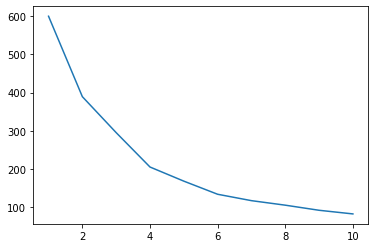

In [623]:
multivar_inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    multivar_inertia.append(km.inertia_)
    
sns.lineplot(x=range(1,11),y=multi_inertia)

In [ ]:
km = KMeans(n_clusters=5)
km.fit(df_scaled)

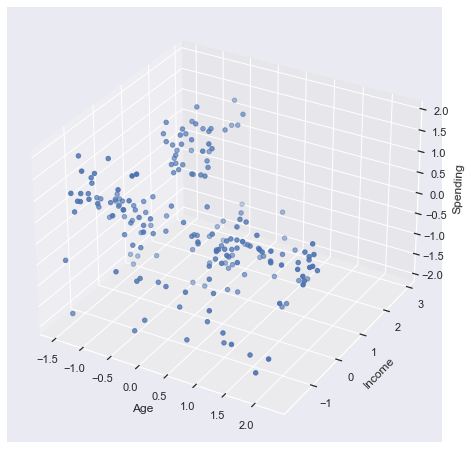

In [648]:
from mpl_toolkits.mplot3d import Axes3D
col,col2,col3,col4 = df_scaled.columns

sns.set(style='darkgrid')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection ='3d')

x=df_scaled[col]
y=df_scaled[col2]
z=df_scaled[col3]

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Spending")

ax.scatter(x,y,z )
plt.show()

In [644]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [626]:
df_copy.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_cluster,Annual Income (k$)_cluster,Spending Score (1-100)_cluster
0,Male,19,15,39,0,1,1
1,Male,21,15,81,0,1,0
2,Female,20,16,6,0,1,1
3,Female,23,16,77,0,1,0
4,Female,31,17,40,0,1,1


In [627]:
df_3.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Spending Score (1-100)_cluster,Spending Score (1-100)_Annual Income (k$)_cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,2,3
2,Female,20,16,6,1,2
3,Female,23,16,77,2,3
4,Female,31,17,40,0,2


In [645]:
df_scaled.tail()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152
199,-0.635135,2.917671,1.273347,1.128152
